In [1]:
pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 10.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import glob, random, os, warnings
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip gdrive/My\ Drive/Validation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Validation/REAL/0000 (10).jpg  
  inflating: Validation/REAL/0000 (2).jpg  
  inflating: Validation/REAL/0000 (3).jpg  
  inflating: Validation/REAL/0000 (4).jpg  
  inflating: Validation/REAL/0000 (5).jpg  
  inflating: Validation/REAL/0000 (6).jpg  
  inflating: Validation/REAL/0000 (7).jpg  
  inflating: Validation/REAL/0000 (8).jpg  
  inflating: Validation/REAL/0000 (9).jpg  
  inflating: Validation/REAL/0000.jpg  
  inflating: Validation/REAL/0001 (10).jpg  
  inflating: Validation/REAL/0001 (2).jpg  
  inflating: Validation/REAL/0001 (3).jpg  
  inflating: Validation/REAL/0001 (4).jpg  
  inflating: Validation/REAL/0001 (5).jpg  
  inflating: Validation/REAL/0001 (6).jpg  
  inflating: Validation/REAL/0001 (7).jpg  
  inflating: Validation/REAL/0001 (8).jpg  
  inflating: Validation/REAL/0001 (9).jpg  
  inflating: Validation/REAL/0001.jpg  
  inflating: Validation/REAL/0002 (10).jpg  
  inflating: Validation/REAL/0

In [5]:
!unzip gdrive/My\ Drive/Train.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/REAL/4500 (4).jpg  
  inflating: Train/REAL/4500 (5).jpg  
  inflating: Train/REAL/4500 (6).jpg  
  inflating: Train/REAL/4500 (7).jpg  
  inflating: Train/REAL/4500 (8).jpg  
  inflating: Train/REAL/4500 (9).jpg  
  inflating: Train/REAL/4500.jpg     
  inflating: Train/REAL/4501 (10).jpg  
  inflating: Train/REAL/4501 (2).jpg  
  inflating: Train/REAL/4501 (3).jpg  
  inflating: Train/REAL/4501 (4).jpg  
  inflating: Train/REAL/4501 (5).jpg  
  inflating: Train/REAL/4501 (6).jpg  
  inflating: Train/REAL/4501 (7).jpg  
  inflating: Train/REAL/4501 (8).jpg  
  inflating: Train/REAL/4501 (9).jpg  
  inflating: Train/REAL/4501.jpg     
  inflating: Train/REAL/4502 (10).jpg  
  inflating: Train/REAL/4502 (2).jpg  
  inflating: Train/REAL/4502 (3).jpg  
  inflating: Train/REAL/4502 (4).jpg  
  inflating: Train/REAL/4502 (5).jpg  
  inflating: Train/REAL/4502 (6).jpg  
  inflating: Train/REAL/4502 (7).jpg  
  inflating: 

In [6]:
!unzip gdrive/My\ Drive/Test.zip

Streaming output truncated to the last 5000 lines.
  inflating: Test/REAL/0500 (10).jpg  
  inflating: Test/REAL/0500 (2).jpg  
  inflating: Test/REAL/0500 (3).jpg  
  inflating: Test/REAL/0500 (4).jpg  
  inflating: Test/REAL/0500 (5).jpg  
  inflating: Test/REAL/0500 (6).jpg  
  inflating: Test/REAL/0500 (7).jpg  
  inflating: Test/REAL/0500 (8).jpg  
  inflating: Test/REAL/0500 (9).jpg  
  inflating: Test/REAL/0500.jpg      
  inflating: Test/REAL/0501 (10).jpg  
  inflating: Test/REAL/0501 (2).jpg  
  inflating: Test/REAL/0501 (3).jpg  
  inflating: Test/REAL/0501 (4).jpg  
  inflating: Test/REAL/0501 (5).jpg  
  inflating: Test/REAL/0501 (6).jpg  
  inflating: Test/REAL/0501 (7).jpg  
  inflating: Test/REAL/0501 (8).jpg  
  inflating: Test/REAL/0501 (9).jpg  
  inflating: Test/REAL/0501.jpg      
  inflating: Test/REAL/0502 (10).jpg  
  inflating: Test/REAL/0502 (2).jpg  
  inflating: Test/REAL/0502 (3).jpg  
  inflating: Test/REAL/0502 (4).jpg  
  inflating: Test/REAL/0502 (5).jp

In [7]:
!pip install vit_keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=369cd6d5b14c42fdd236fc4889fd9144715ee1e90285554e71fed783cb08da01
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [8]:
image_size = 224
batch_size = 16
n_classes = 3
EPOCHS_vit = 1

In [9]:
from vit_keras import vit

vit_model = vit.vit_b16(
        image_size = image_size,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

347502902/347502902 [==============================] - 3s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


In [10]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

In [11]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)

    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    if p_spatial > .75:
        image = tf.image.transpose(image)

    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º

    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)

    return image

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
            samplewise_center = True, samplewise_std_normalization = True,
            preprocessing_function = data_augment)

train_gen  = datagen.flow_from_directory(
    '/content/Train',
    target_size=(224, 224),
    batch_size = batch_size,
    seed = 1,
    color_mode = 'rgb',
    class_mode='categorical',
    subset='training')




Found 100000 images belonging to 2 classes.


Image size: 224 X 224
Patch size: 7 X 7
Patches per image: 1024
Elements per patch: 147


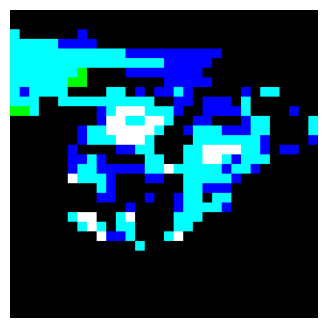

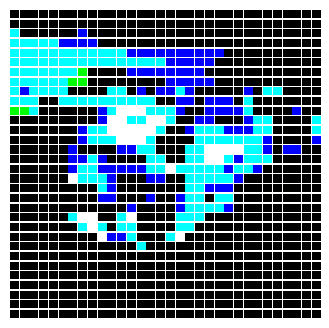

In [13]:
plt.figure(figsize=(4, 4))
batch_size = 16
patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2

x = train_gen.next()
image = x[0][0]

plt.imshow(image.astype('uint8'))
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {image_size} X {image_size}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype('uint8'))
    plt.axis('off')

In [45]:
valid_gen  = datagen.flow_from_directory(
    '/content/Validation' ,
    target_size=(224, 224),
    batch_size = batch_size,
    seed = 1,
    color_mode = 'rgb',
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [44]:
# Test Dataset

test_gen  = datagen.flow_from_directory(
    '/content/Test' ,
    target_size=(224, 224),
    batch_size = batch_size,
    seed = 1,
    color_mode = 'rgb',
    class_mode='categorical')

Found 10000 images belonging to 3 classes.


In [16]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(32, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(2, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (BatchN  (None, 768)              3072      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)         

In [17]:
warnings.filterwarnings("ignore")

learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
              metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size



early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True, verbose = 1)

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS_vit,
          callbacks = early_stopping_callbacks)

6250/6250 [==============================] - 1590s 248ms/step - loss: 0.4302 - accuracy: 0.9118 - val_loss: 0.3925 - val_accuracy: 0.9432


In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
# Define the paths to the test images
test_folder = "/content/Test"  # Replace with the path to the extracted Test folder
real_folder = os.path.join(test_folder, "REAL")
fake_folder = os.path.join(test_folder, "FAKE")

In [36]:
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predictions = []

In [37]:
import cv2

def preprocess_image(image_path, target_size=(224, 224)):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    # Convert the pixel values to the range [0, 1]
    image = image.astype('float32') / 255

    # Resize the image
    image = cv2.resize(image, target_size)


    image = data_augment(image)

    return image


In [38]:
# Iterate through the test images in the "REAL" folder
for image_file in os.listdir(real_folder):
    image_path = os.path.join(real_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("REAL")
    predictions.append(predicted_label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 55ms/step


In [40]:
# Iterate through the test images in the "FAKE" folder
fake_folder = os.path.join(test_folder, "FAKE")
for image_file in os.listdir(fake_folder):
    image_path = os.path.join(fake_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("FAKE")
    predictions.append(predicted_label)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 43ms/step


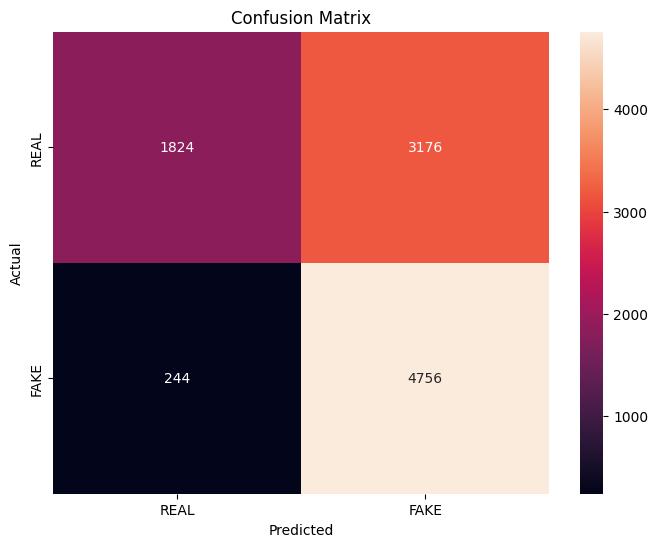

In [41]:
# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=["REAL", "FAKE"])

# Visualize the confusion matrix
labels = ["REAL", "FAKE"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
print(classification_report(ground_truth, predictions, labels=["REAL", "FAKE"]))

              precision    recall  f1-score   support

        REAL       0.88      0.36      0.52      5000
        FAKE       0.60      0.95      0.74      5000

    accuracy                           0.66     10000
   macro avg       0.74      0.66      0.63     10000
weighted avg       0.74      0.66      0.63     10000



In [ ]:
score = model.evaluate(test_gen)

2892/2892 [==============================] - 546s 189ms/step - loss: 0.4284 - accuracy: 0.9123


[0.4284454882144928, 0.9122776389122009]

In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# ResNet50

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [56]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [57]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
____________________________________

In [58]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [59]:
model2 = tf.keras.Sequential()

base1= tf.keras.applications.ResNet50V2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

model2.add(base1)

model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(128, activation = tfa.activations.gelu))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(64, activation = tfa.activations.gelu))
model2.add(tf.keras.layers.Dense(32, activation = tfa.activations.gelu))
model2.add(tf.keras.layers.Dense(2, 'softmax'))

for layer in base1.layers:
    layer.trainable = False

model2.summary()

94668760/94668760 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                       

In [61]:
EPOCHS_resnet = 3
model2.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
              metrics = ['accuracy'])

history = model2.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS_resnet,
          callbacks = early_stopping_callbacks)

Epoch 1/3
6250/6250 [==============================] - 1232s 196ms/step - loss: 0.5402 - accuracy: 0.8002 - val_loss: 0.5049 - val_accuracy: 0.8384
Epoch 2/3
6250/6250 [==============================] - 1203s 192ms/step - loss: 0.5073 - accuracy: 0.8352 - val_loss: 0.4870 - val_accuracy: 0.8610
Epoch 3/3
6250/6250 [==============================] - 1190s 190ms/step - loss: 0.4966 - accuracy: 0.8448 - val_loss: 0.4874 - val_accuracy: 0.8550


In [62]:
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predictions = []

In [63]:
# Iterate through the test images in the "REAL" folder
for image_file in os.listdir(real_folder):
    image_path = os.path.join(real_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model2.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("REAL")
    predictions.append(predicted_label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step


In [64]:
# Iterate through the test images in the "FAKE" folder
fake_folder = os.path.join(test_folder, "FAKE")
for image_file in os.listdir(fake_folder):
    image_path = os.path.join(fake_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model2.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("FAKE")
    predictions.append(predicted_label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 25ms/step


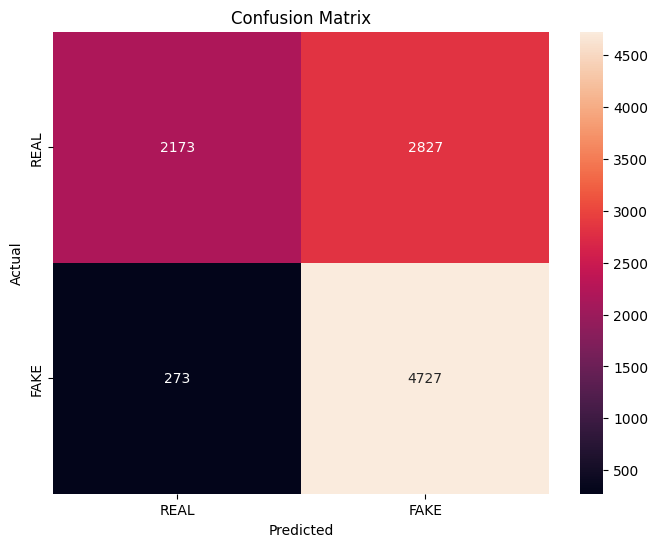

In [65]:
# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=["REAL", "FAKE"])

# Visualize the confusion matrix
labels = ["REAL", "FAKE"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
print(classification_report(ground_truth, predictions, labels=["REAL", "FAKE"]))

              precision    recall  f1-score   support

        REAL       0.89      0.43      0.58      5000
        FAKE       0.63      0.95      0.75      5000

    accuracy                           0.69     10000
   macro avg       0.76      0.69      0.67     10000
weighted avg       0.76      0.69      0.67     10000



In [69]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()



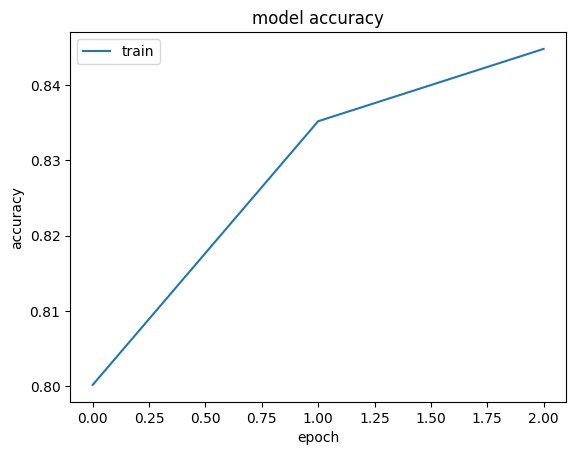

In [70]:
plot_hist(history)

In [71]:
from keras import metrics

model2.compile(loss='mean_squared_error', optimizer='sgd',
              metrics=[metrics.mae,
                       metrics.categorical_accuracy])

Text(0.5, 1.0, 'Accuracy Curves')

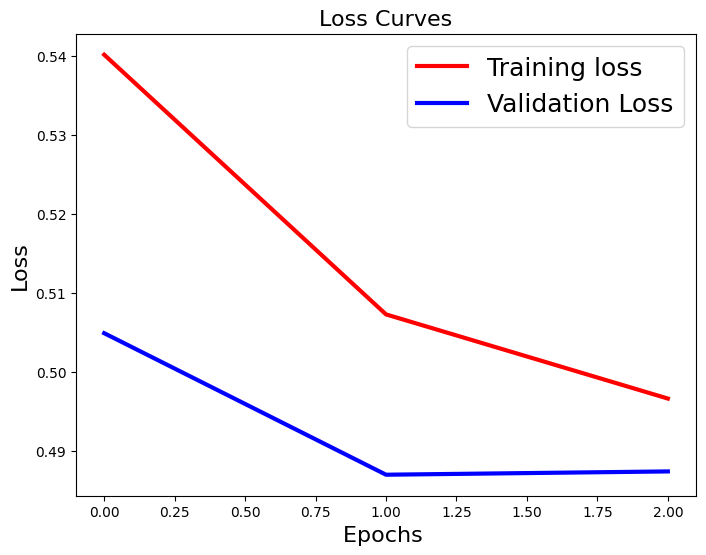

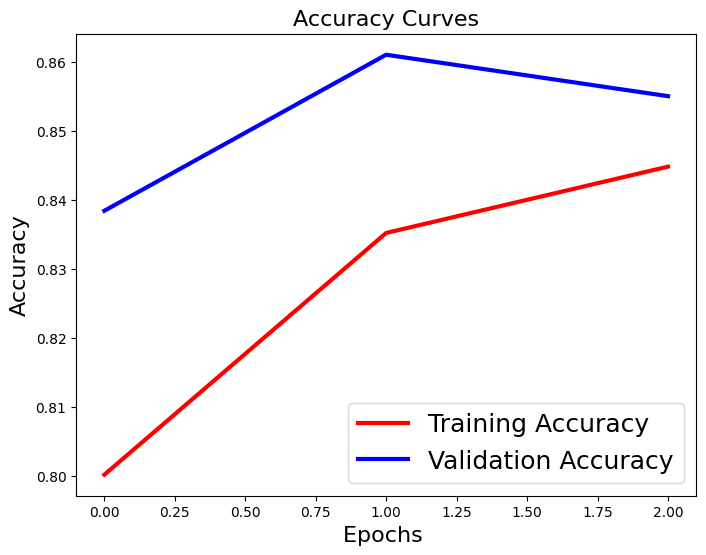

In [74]:

#Plot the Graph

# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Efficient Net

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [123]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


NUM_CLASSES = 2
IMG_SIZE = 224

In [124]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [125]:
model3 = build_model(num_classes=NUM_CLASSES)

In [126]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


#plot_hist(hist)

In [127]:
img_height,img_width=224,224
batch_size=32

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Train', #load the training dataset,
  #validation_split=0.2, #remove later
  #subset="training", #remove later
  seed=123,
  image_size=(img_height, img_width))

Found 100000 files belonging to 2 classes.


In [128]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Validation', #load the validation dataset,
  #validation_split=0.2,
  #subset="validation", #remove later
  seed=123, # remove later
  image_size=(img_height, img_width))

Found 10000 files belonging to 2 classes.


In [129]:
class_names_train = train_ds.class_names
print(class_names_train)

['FAKE', 'REAL']


In [130]:
class_names_val = val_ds.class_names
print(class_names_val)

['FAKE', 'REAL']


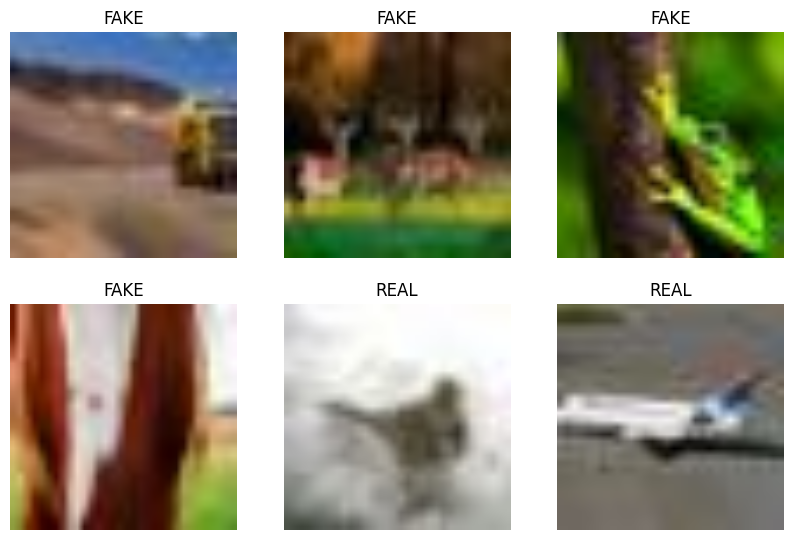

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

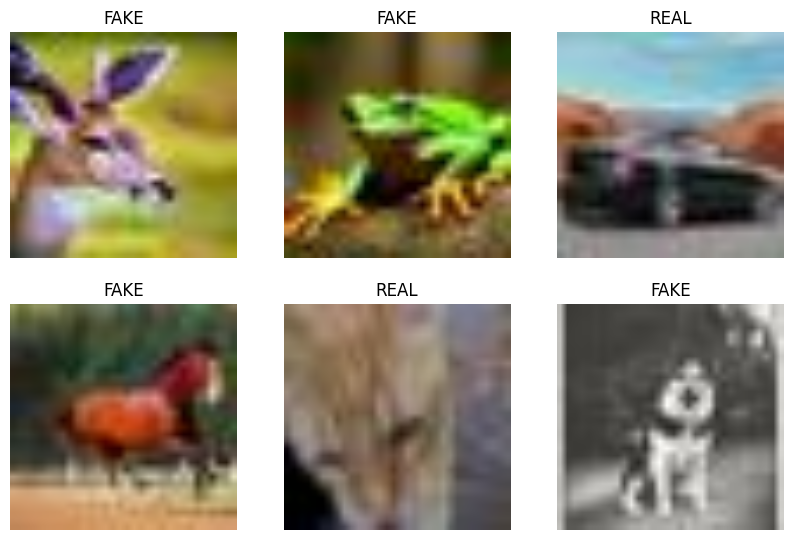

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_val[labels[i]])
    plt.axis("off")

In [119]:
size = (IMG_SIZE, IMG_SIZE)
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, size), label))
val_ds = val_ds.map(lambda image, label: (tf.image.resize(image, size), label))

In [120]:
# One-hot / categorical encoding
def input_preprocess(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label


train_ds = train_ds.map(
    input_preprocess, num_parallel_calls=tf.data.AUTOTUNE
)
train_ds = train_ds.batch(batch_size=batch_size, drop_remainder=True)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(input_preprocess)
val_ds = val_ds.batch(batch_size=batch_size, drop_remainder=True)

In [114]:
training_data = train_ds  # Your training data
training_data = np.reshape(training_data, (None, 224, 224, 3))

TypeError: ignored

Epoch 1/3
3125/3125 - 81s - loss: 0.4885 - accuracy: 0.8426 - val_loss: 0.2716 - val_accuracy: 0.8864 - 81s/epoch - 26ms/step
Epoch 2/3
3125/3125 - 67s - loss: 0.3533 - accuracy: 0.8519 - val_loss: 0.2911 - val_accuracy: 0.8787 - 67s/epoch - 21ms/step
Epoch 3/3
3125/3125 - 67s - loss: 0.3688 - accuracy: 0.8438 - val_loss: 0.3026 - val_accuracy: 0.8756 - 67s/epoch - 21ms/step


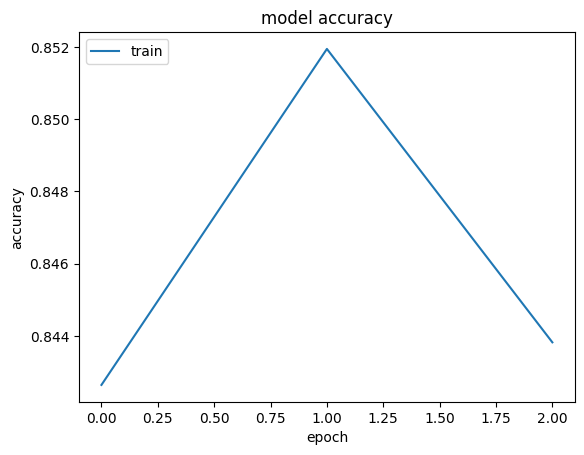

In [132]:
epochs = 3
#hist = model.fit(train_x, train_y, epochs=epochs, verbose=2)

histo= model3.fit(train_ds, epochs=epochs, validation_data=val_ds, verbose=2, batch_size=32)
plot_hist(histo)

In [ ]:
model3.save('/content/gdrive/MyDrive/efficientNet1.h5')

In [133]:
# Initialize lists to store ground truth and predicted labels
ground_truth = []
predictions = []

In [134]:
# Iterate through the test images in the "REAL" folder
for image_file in os.listdir(real_folder):
    image_path = os.path.join(real_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model3.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("REAL")
    predictions.append(predicted_label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step


In [135]:
# Iterate through the test images in the "FAKE" folder
fake_folder = os.path.join(test_folder, "FAKE")
for image_file in os.listdir(fake_folder):
    image_path = os.path.join(fake_folder, image_file)
    # Preprocess the image (if not already preprocessed)
    preprocessed_image = preprocess_image(image_path)  # Replace with your preprocessing code

    # Perform prediction using the pre-trained model
    prediction = model3.predict(np.expand_dims(preprocessed_image, axis=0))
    predicted_label = "REAL" if np.argmax(prediction) == 0 else "FAKE"

    # Append the ground truth and predicted labels
    ground_truth.append("FAKE")
    predictions.append(predicted_label)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


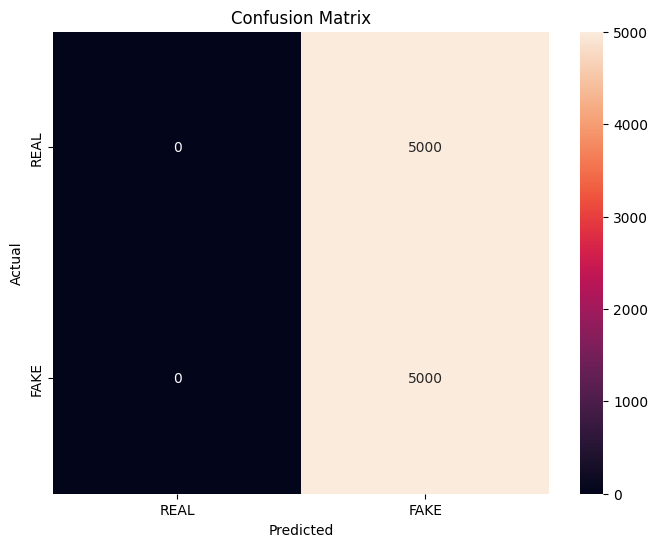

In [136]:
# Generate the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=["REAL", "FAKE"])

# Visualize the confusion matrix
labels = ["REAL", "FAKE"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(ground_truth, predictions, labels=["REAL", "FAKE"]))

In [ ]:
plot_hist(histo)